
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/tell-roadrunner.png" width="75%" style="padding: 20px"></div>
<div align='center' style='font-size:100%'>
Veronica L. Porubsky, BS
<div align='center' style='font-size:100%'>Sauro Lab PhD Student, Department of Bioengineering<br>
Outreach Coordinator, <a href="https://reproduciblebiomodels.org/dissemination-and-training/seminar/">Center for Reproducible Biomedical Modeling</a><br>
University of Washington, Seattle, WA USA
</div>
<hr>

# Tellurium tutorial solution manual useful resources:

<a href="https://github.com/sys-bio/tellurium#installation-instructions">Tellurium installation instructions</a><br>
<a href="https://tellurium.readthedocs.io/en/latest/">Tellurium documentation</a><br>
<a href="https://libroadrunner.readthedocs.io/en/latest/">libRoadRunner documentation</a><br>
<a href="https://tellurium.readthedocs.io/en/latest/antimony.html">Antimony documentation</a><br>
<a href="http://phrasedml.sourceforge.net/phrasedml__api_8h.html">PhraSED-ML documentation</a><br>
<a href="https://nanohub.org/resources/tellurium">Tellurium environment on nanoHUB</a><br>

Note: Tellurium and libRoadRunner do not currently support Python 3.7. To use a Python 3.6 distribution without altering the distribution on your local machine, download the Tellurium Spyder IDE, notebook, use nanoHUB, or run this Jupyter notebook on Google Colaboratory.

# Installing relevant packages/ libraries:

In [ ]:
# First, install Tellurium, which comes with libRoadRunner 
!pip install tellurium


# Importing relevant packages:

In [61]:
import tellurium as te # Python-based modeling environment for kinetic models
import roadrunner as rr # High-performance simulation and analysis library
import phrasedml # Human-readable analog of SED-ML for authoring SED-ML scripts
import numpy as np # Scientific computing package
import random # Generate random numbers
import matplotlib.pylab as plt # Additional Python plotting utilities
import os # Useful for exporting files to current directory

# Challenge 1:

Create an Antimony string for the following reaction network:

<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/simple-model.png" width="40%" style="padding: 20px"></div>

In [62]:
# Write a simple antimony string
antStr = '''

    J1: S1 -> S2; k1*S1; # Reaction names 'J1', 'J2'
    J2: S2 -> S3; k2*S2;
    
    k1 = 0.15; k2 = 0.45; # Specify parameter values
    S1 = 1; S2 = 0; S3 = 0; # Specify initial conditions
'''

# Challenge 2:

Create a RoadRunner object instance with your Antimony string and simulate your model from time 0 to time 20 with 50 data points.

In [64]:
# Load the Antimony string to a RoadRunner object instance 'r'
r = te.loada(antStr)

# Simulate the model (numerically integrate the differential equations)
r.simulate(0, 20, 25)


        time,      [S1],      [S2],      [S3]
 [[        0,         1,         0,         0],
  [ 0.833333,  0.882497, 0.0976039, 0.0198992],
  [  1.66667,  0.778801,  0.153217, 0.0679819],
  [      2.5,  0.687289,  0.181319,  0.131392],
  [  3.33333,  0.606531,    0.1917,  0.201769],
  [  4.16667,  0.535261,  0.190953,  0.273785],
  [        5,  0.472367,  0.183483,   0.34415],
  [  5.83333,  0.416862,  0.172211,  0.410927],
  [  6.66667,  0.367879,  0.159046,  0.473074],
  [      7.5,  0.324652,  0.145217,  0.530131],
  [  8.33333,  0.286505,  0.131493,  0.582002],
  [  9.16667,   0.25284,  0.118338,  0.628823],
  [       10,   0.22313,   0.10601,  0.670859],
  [  10.8333,  0.196912, 0.0946381,   0.70845],
  [  11.6667,  0.173774,  0.084263,  0.741963],
  [     12.5,  0.153355, 0.0748741,  0.771771],
  [  13.3333,  0.135335, 0.0664282,  0.798236],
  [  14.1667,  0.119433, 0.0588646,  0.821702],
  [       15,  0.105399, 0.0521141,  0.842487],
  [  15.8333, 0.0930145, 0.0461048,  0.860

# Challenge 3:

Plot the simulation with a title and x and y axis labels.

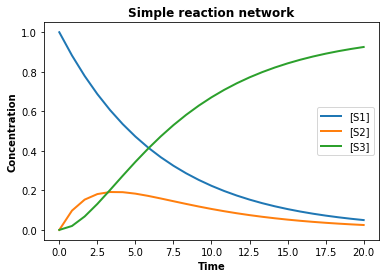

In [65]:
# Plot the simulation results
r.plot(title  = 'Simple reaction network', xtitle = 'Time', ytitle = 'Concentration')


# Challenge 4:

Reset your model, simulate, and plot only the species S2 concentration timecourse.

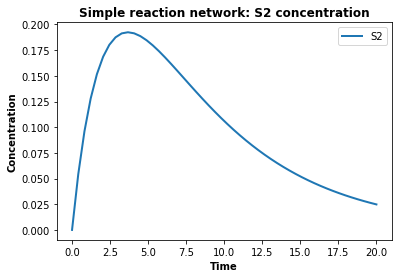

In [30]:
# Reset the model species concentrations to the initial conditions
r.reset()

# Simulate the model with selections 'time' and 'S2'
r.simulate(0, 20, 50, ['time', 'S2'])
r.plot(title  = 'Simple reaction network: S2 concentration', xtitle = 'Time', ytitle = 'Concentration')


# Challenge 5:

Add an event to your Antimony string to set k2 = 0.01 after 10 seconds of simulation time. Load the string to create a RoadRunner instance, simulate the model and plot the timecourse of S2 concentration and k2 values throughout the simulation.

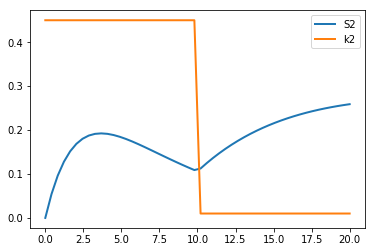

In [31]:
# Add an event to the Antimony string
antStr_with_event = antStr + '''E1: at (time > 10): k2 = 0.01'''
r = te.loada(antStr_with_event)

# Simulate the model with an event, and record the value of 'k2'
r.simulate(0, 20, 50, ['time', 'S2', 'k2'])
r.plot()

# Challenge 6:

Perform and plot a parameter scan of 'k1' from k1 = 0.1 to k1 = 1.0 in steps of 0.15, using your model which does not include events.

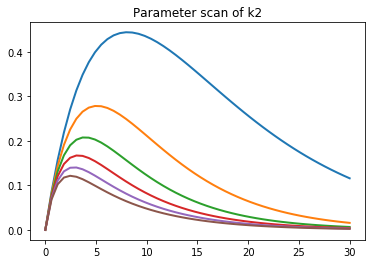

In [32]:
r = te.loada(antStr)
k2_vals = np.arange(0.1, 1.0, 0.15) # choose the value of k2 from 0.1 to 1.0 in 0.15 increments
for k2 in k2_vals:
    r.k2 = k2 # set the value of k2 at each loop iteration
    r.reset() # reset the variable species concentrations
    result = r.simulate(0, 30, 50, ['time', 'S2'])
    
    # store plot specifications, but do not show plot at each iteration of for loop
    te.plotArray(result, title = 'Parameter scan of k2', show = False, resetColorCycle= False) 
te.show()


# Challenge 7:

Set the initial conditions of your model to: [S1] = 20, [S2] = 10, [S3] = 10. Perform and plot a stochastic simulation of your model. Next, produce a distribution of stochastic simulation trajectories.

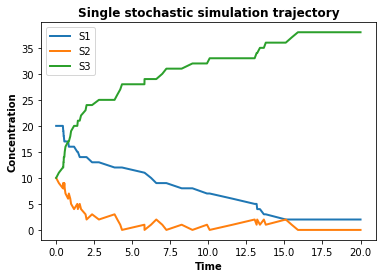

In [33]:
r.reset()
r.S1 = 20 # set the initial value for [S1]
r.S2 = 10 # set the initial value for [S2]
r.S3 = 10 # set the initial value for [S3]
all_species_selections = ['time'] + r.getFloatingSpeciesIds()

# Use the Gillespie algorithm to perform the simulation
r.gillespie(0, 20, selections = all_species_selections) 
r.plot(title = 'Single stochastic simulation trajectory', xtitle = 'Time', ytitle = 'Concentration')


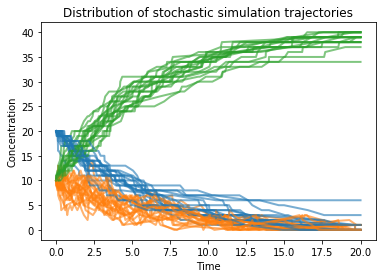

In [34]:
r = te.loada(antStr)
results = []

# Create a distribution of stochastic trajectories
for k in range(1, 20):
    r.reset()
    r.S1 = 20
    r.S2 = 10
    r.S3 = 10
    s = r.gillespie(0, 20)
    results.append(s)
    te.plotArray(s, title = 'Distribution of stochastic simulation trajectories',\
                     xlabel = 'Time', ylabel = 'Concentration', show=False, alpha=0.6)
te.show()

# Challenge 8:

Export an SBML file of your model from the previous challenges to your current working directory. Use the initial model settings from Challenge 1. Then import and load the SBML file you have just saved, simulate using the default deterministic integrator (CVODE), and ensure your simulation results match those in Challenge 3.

In [48]:
# Export the model to an SBML description format, set current = False to reset to the Antimony string values
r.exportToSBML(os.getcwd() + '\\three_species_sbml.xml', current = False)

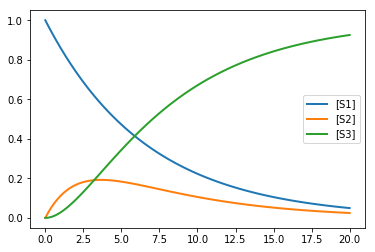

In [49]:
# Load the saved SBML file to a RoadRunner instance
r = te.loadSBMLModel('three_species_sbml.xml')
r.simulate(0, 20, 100)
r.plot()

# Challenge 9:

Write a PhraSED-ML string to specify a simple simulation experiment in which the reactions in your model from Challenge 1 are numerically integrated (with the default integrator) from time = 0 to time = 20 and plots only species [S1] and [S3]. Convert the PhraSED-ML to SED-ML, execute, and export the SED-ML to your current working directory. Execute the SED-ML script using the file which you exported.

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.0.9 with libSBML version 5.15.0. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version2" level="1" version="2">
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="20" numberOfPoints="100">
      <algorithm kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-1" source="three_species_model.xml"/>
  </listOfModels>
  <listOfTasks>
    <task id="task1" modelReference="model1" simulationReference="sim1"/>
  </listOfTasks>
  <listOfDataGenerators>
    <dataGenerator id="plot_0_0_0" name="time">
      <listOfVariables>
        <variable id="time" symbol="urn:sedml:symbol:time" taskReference="task1"/>
      </listOfVariables>
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> time </ci>
      </math>
    </dataGenerator>
    <dataGe

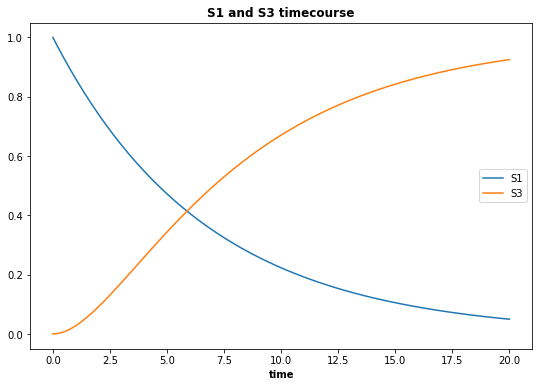

In [57]:
# Write your simulation experiment using a PhraSED-ML string
phrasedml_str = '''
  model1 = model "three_species_model.xml"
  sim1 = simulate uniform(0, 20, 100)
  task1 = run sim1 on model1
  plot "S1 and S3 timecourse" time vs S1, S3
'''

# convert the Antimony string from Challeng 1 to an SBML string
sbml_str = te.antimonyToSBML(antStr)

# Set your saved SBML three-species model as the SBML file that will be referenced
phrasedml.setReferencedSBML("three_species_model.xml", sbml_str)

# Create the SED-ML xml string from the phrasedml
sedml_str = phrasedml.convertString(phrasedml_str)
if sedml_str == None:
    print(phrasedml.getLastPhrasedError())

# Visualize the SED-ML file    
print(sedml_str)

# Execute the simulation experiment specified with SED-ML
te.executeSEDML(sedml_str)

# Save the SED-ML simulation experiment to your current working directory
te.saveToFile(str(os.getcwd()) + '\\three_species_model_simulation_experiment.xml', sedml_str)




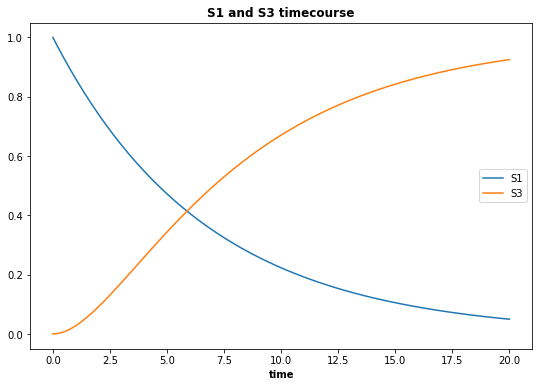

In [53]:
# Execute the SED-ML directly from the file you saved to the current working directory
te.executeSEDML('three_species_model_simulation_experiment.xml')


# Challenge 10:

Download the data (saved as a numpy array file) in <a href="https://github.com/vporubsky/tellurium-libroadrunner-tutorial/blob/master/simple_model_training_data.npy"> 'simple_model_training_data.npy' on GitHub </a> to your working directory. These data represent noisy experimental timecourse results for [S1], [S2], [S3] in the system you are modeling from Challenge 1. The four columns in the data correspond to 'time', '[S1]', '[S2]', and '[S3]', respectively. 

Plot the experimental data.

In [58]:
# Download the data from GitHub

import urllib.request # use this library to download file from GitHub
import os # use this library to determine current working directory to download the data from Github to

# URL to the data
url = 'https://github.com/vporubsky/tellurium-libroadrunner-tutorial/blob/master/simple_model_training_data.npy?raw=true'

# Obtain the path for the current working directory
working_dir = os.getcwd()

# Save the data from the url
filename, headers = urllib.request.urlretrieve(url, filename= working_dir + "\\simple_model_training_data.npy")
 

In [59]:
# Load the experimental data
training_data = np.load('simple_model_training_data.npy') # col 1 = time, col 2 = [S1], col 3 = [S2], col 4 = [S3]
 

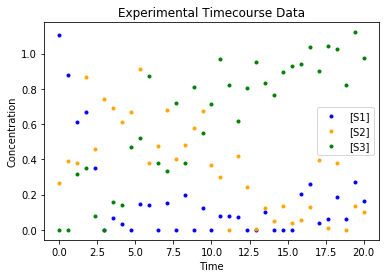

In [67]:
# Plot the experimental data
color_list = ['blue', 'orange', 'green']
for i in range(3):
    plt.plot(training_data[:, 0], training_data[:, i + 1], '.', color = color_list[i])
plt.title('Experimental Timecourse Data')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(['[S1]', '[S2]', '[S3]'])

# Challenge 11:

Use all the species' experimental data from Challenge 8 to perform parameter fitting with your model from Challenge 1 and determine values for k1 and k2. Report your optimized values for k1 and k2.

In [17]:
# Choose an optimization method and import relevant libraries/functions
from scipy.optimize import differential_evolution

# Load your Antimony string model from Challenge 1 and examine the parameters
r = te.loada(antStr)
parameters = r.getGlobalParameterIds() # parameters which will be optimized
    
def select_species(species_indices = [1, 2, 3]): # Enter column index to determine which species data to use for fitting
    selections = species_indices 
    names = []
    for i in selections:
        names.append(r.getFloatingSpeciesIds()[i-1])
    return selections, names

# Write an objective function to minimize with differential evolution, such as the root mean square error (RMSE)

def sim_model(s): # function will produce simulation results for the input parameter values
    r.reset()
    
    # Set parameter value in model using values in s, which will be determined by the 
    # scipy.optimize.differential_evolution algorithm
    
    for index, p in enumerate(r.getGlobalParameterIds()):
        r.setValue (p, s[index])
    simulation_data = r.simulate(training_data[0, 0], training_data[len(training_data)-1 , 0], len(training_data)) # (start, end, timepoints)
    return simulation_data

def rmse(s):
    model_prediction = sim_model(s)
    species_sum = (sum((training_data[:, species_fitting_selections] - model_prediction[:, species_fitting_selections])**2))\
                    /len(training_data[:, species_fitting_selections])
    return sum(species_sum)

In [18]:
# Perform the optimization/ parameter fitting using scipy.optimize.differential_evolution

species_fitting_selections, species_fitting_names = select_species(species_indices = [1,2,3]) # use all species' data
model_fit_params = differential_evolution(rmse, [(0.00001, 20)]*len(parameters), maxiter=100) # perform parameter fitting

print(model_fit_params) # examine the results of optimization with scipy.optimize.differential_evolution
print('')
print('Parameter fitting was performed using training data from the following species:')
print(species_fitting_names)
print('')
print('The optimized value for k1 is: ' + str(model_fit_params.x[0])) 
print('The optimized value for k2 is: ' + str(model_fit_params.x[1]))
print('The ground truth values values are k1 = 0.55 and k2 = 0.15')


     fun: 0.0680760782373913
     jac: array([4.54358773e-06, 3.77753384e-06])
 message: 'Optimization terminated successfully.'
    nfev: 561
     nit: 17
 success: True
       x: array([0.56625335, 0.14585026])

Parameter fitting was performed using training data from the following species:
['S1', 'S2', 'S3']

The optimized value for k1 is: 0.5662533464724977
The optimized value for k2 is: 0.14585026101177662
The ground truth values values are k1 = 0.55 and k2 = 0.15


# Challenge 12:

Determine which single species timecourse is most important to fit the parameter values effectively. The ground truth values are: k1 = 0.55 and k2 = 0.15. 

In [19]:
r.reset()
print('The ground truth values are k1 = 0.55 and k2 = 0.15')
for i in [1, 2, 3]:
    species_fitting_selections, species_fitting_names = select_species(species_indices = [i])
    model_fit_params = differential_evolution(rmse, [(0.00001, 20)]*len(parameters), maxiter=100) # parameter fitting
    print('')
    print('Parameter fitting was performed using training data from the following species:')
    print(species_fitting_names)
    print('')
    print('The optimized value for k1 is: ' + str(model_fit_params.x[0])) 
    print('The optimized value for k2 is: ' + str(model_fit_params.x[1]))

print('')
print('When fitting with a single species timecourse, species S2 typically provides the best fit.')

The ground truth values values are k1 = 0.55 and k2 = 0.15

Parameter fitting was performed using training data from the following species:
['S1']

The optimized value for k1 is: 0.4674980718272761
The optimized value for k2 is: 5.335786577336391

Parameter fitting was performed using training data from the following species:
['S2']

The optimized value for k1 is: 0.7001392464755583
The optimized value for k2 is: 0.12511641850528013

Parameter fitting was performed using training data from the following species:
['S3']

The optimized value for k1 is: 0.2618886952768839
The optimized value for k2 is: 0.2651699843872763

When fitting with a single species timecourse, species S2 typically provides the best fit.


# Challenge 13:

Plot the uncertainty in species S1, S2, and S3 concentrations in response to changes in the parameters, k1 and k2.

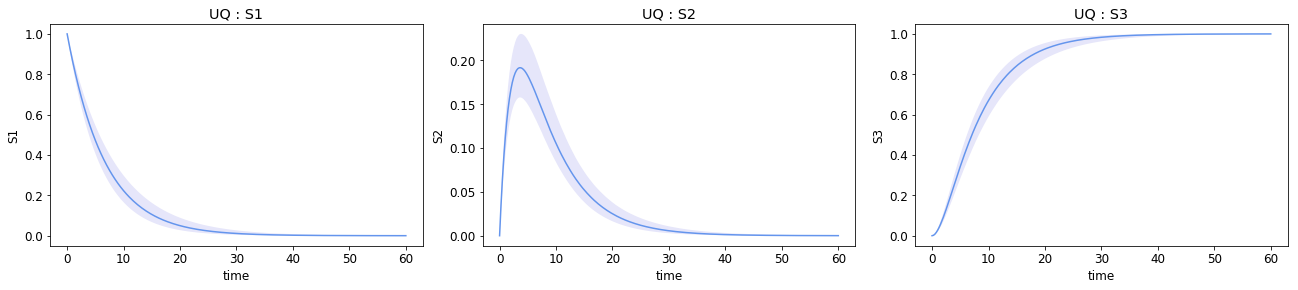

In [26]:
# Sample all parameter values from a normal distribution and propagate the uncertainty
te.utils.uncertainty.UncertaintyAllP(r, variables = ['S1', 'S2', 'S3'], parameters = ['k1', 'k2'])

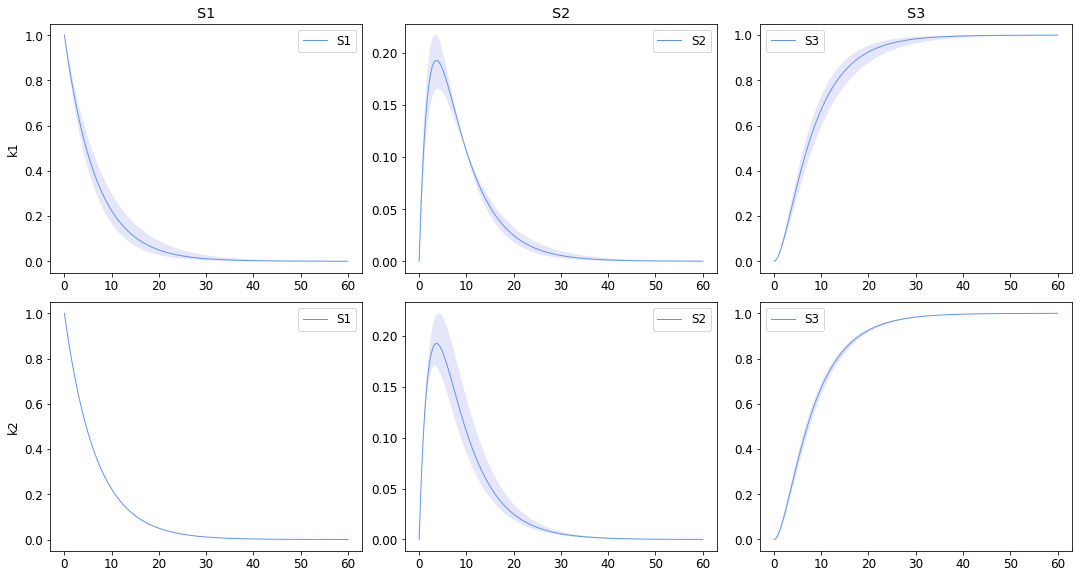

In [27]:
# Sample a single parameter value at a time using a normal distribution and propagate the uncertainty
te.utils.uncertainty.UncertaintySingleP(r, variables = ['S1', 'S2', 'S3'], parameters = ['k1', 'k2'])

# Challenge 14:

Load, simulate, and plot the simulation results of the <a href="http://www.ebi.ac.uk/biomodels-main/BIOMD0000000010 "> Kholodenko 2000 model</a> of ultrasensitivity and negative feedback oscillations in the MAPK cascade from the BioModels Database.

<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/kholodenko_publication.PNG" width="75%"></div>

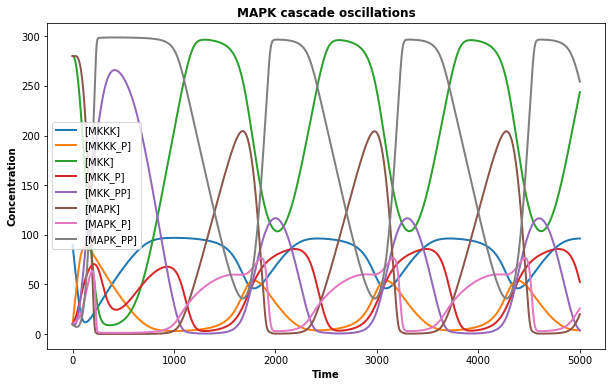

In [95]:
kholodenko = te.loadSBMLModel("http://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000010")
kholodenko.simulate(0, 5000, 5000)
kholodenko.plot(figsize = (10, 6), title = 'MAPK cascade oscillations',\
                xtitle = 'Time', ytitle = 'Concentration')
 

# Challenge 15:

Try to compute the steady state of the Kholodenko 2000 model. 

You will get an error. What does this error message suggest as the reason the steady state could not be computed? Examine the Jacobian matrix.

Read about the <a href="https://sys-bio.github.io/roadrunner/python_docs/steady_state.html?highlight=conserved%20sum">steady state solver in libRoadRunner’s documentation </a> and examine the network diagram for the model to diagnose the problem:
<br>    
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/kholodenko.png" width="50%" style="padding: 20px"></div>

<div align='center'>(figure from Kholodenko 2000)</div>

<br>
<div align='left'>Based on the network diagram and RoadRunner documentation, adjust the settings in RoadRunner to compute the steady state without raising an error.

In [84]:
# Try to compute the steady state of the Kholodenko 2000 model 
# An error is raised because the Jacobian is singular and therefore cannot be inverted
kholodenko.steadyState() 

RuntimeError: Both steady state solver and approximation routine failed: Jacobian matrix singular in NLEQ. Failed to converge to steady state. Check if Jacobian matrix is non-invertible or steady state solution does not exist.; Failed to converge while running approximation routine. Try increasing the time or maximum number of iteration via changing the settings under r.steadyStateSolver where r is an roadrunner instance. Model might not have a steady state.

In [85]:
# Examine the Jacobian matrix for the Kholodenko 2000 model
# Note that rows are linearly dependent on one another - this is due to the presence of conserved cycles
print(kholodenko.getFullJacobian())
 

                   MKKK,       MKKK_P,          MKK,       MKK_P,      MKK_PP,       MAPK,      MAPK_P,      MAPK_PP
MKKK    [[ -0.000733928,  0.000524359,            0,           0,           0,          0,           0,   0.00196936],
MKKK_P   [  0.000733928, -0.000524359,            0,           0,           0,          0,           0,  -0.00196936],
MKK      [            0,   -0.0230586, -0.000540312,  0.00222613,           0,          0,           0,            0],
MKK_P    [            0,    0.0033337,  0.000540312, -0.00621524,  0.00172516,          0,           0,            0],
MKK_PP   [            0,    0.0197249,            0,  0.00398911, -0.00172516,          0,           0,            0],
MAPK     [            0,            0,            0,           0,  -0.0226017, -0.0010085,  0.00102074,            0],
MAPK_P   [            0,            0,            0,           0,  0.00197655,  0.0010085, -0.00437658,  0.000708041],
MAPK_PP  [            0,            0,            

In [97]:
# Turn on conserved moiety analysis to account for conserved cyles in the MAPK cascade
# Then you may compute the steady state

kholodenko.conservedMoietyAnalysis = True
kholodenko.steadyState()
print('Steady state computed successfully. Steady state values:')
print('')
kholodenko.getSteadyStateValuesNamedArray()
 

Steady state computed successfully. Steady state values:



    [MKK_P], [MAPK_P],  [MKKK],   [MKK],  [MAPK], [MKK_PP], [MKKK_P], [MAPK_PP]
 [[ 41.1421,  99.9714, 76.6351, 238.914, 102.159,  19.9441,  23.3649,   97.8701]]

# Acknowledgements
<br>
<div align='left'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/acknowledgements2.png" width="80%" style="padding: 20px"></div>

<html>
   <head>
      <title>Bibliography</title>
   </head>
   <body>
      <h1>Bibliography</h1>
      <ol>
         <li>
            <p>K. Choi et al., <cite>Tellurium: An extensible python-based modeling environment for systems and synthetic biology</cite>, Biosystems, vol. 171, pp. 74–79, Sep. 2018.</p>
         </li>
         <li>
            <p>E. T. Somogyi et al., <cite>libRoadRunner: a high performance SBML simulation and analysis library.,</cite>, Bioinformatics, vol. 31, no. 20, pp. 3315–21, Oct. 2015.</p>         
          <li>
            <p>L. P. Smith, F. T. Bergmann, D. Chandran, and H. M. Sauro, <cite>Antimony: a modular model definition language</cite>, Bioinformatics, vol. 25, no. 18, pp. 2452–2454, Sep. 2009.</p>
         </li>
         <li>
            <p>K. Choi, L. P. Smith, J. K. Medley, and H. M. Sauro, <cite>phraSED-ML: a paraphrased, human-readable adaptation of SED-ML</cite>, J. Bioinform. Comput. Biol., vol. 14, no. 06, Dec. 2016.</p>
         </li>
         <li>
            <p>	B. N. Kholodenko, <cite>Negative feedback and ultrasensitivity can bring about oscillations in the mitogen-activated protein kinase cascades</cite>, Eur. J. Biochem., vol. 267, no. 6, pp. 1583–1588, Mar. 2000.</p>
         </li>
      </ol>
   </body>
</html>